In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import sqlite3

Mounted at /content/drive


In [ ]:
data = sqlite3.connect('/content/drive/My Drive/data/checking-logs.sqlite.sqlite')

In [ ]:
commits = pd.io.sql.read_sql(
    "select timestamp from checker where uid like 'user_%'",
    data, parse_dates=['timestamp']
    )

In [ ]:
data.close()

In [ ]:
commits['date'] = commits['timestamp'].dt.floor('d')
commits['hour'] = commits['timestamp'].dt.hour
commits = commits.drop('timestamp', axis=1)

In [ ]:
working_day = commits.loc[commits['date'].dt.dayofweek < 5]
weekend = commits.loc[commits['date'].dt.dayofweek >= 5]

In [ ]:
df_1 = working_day.groupby('hour').date.value_counts().unstack(0)
df_1.head()

hour,0,3,5,6,7,8,9,10,11,12,...,14,15,16,17,18,19,20,21,22,23
date,,,,,,,,,,,,,,,,,,,,,
2020-04-17,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,8.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,...,3.0,7.0,NaN,3.0,NaN,10.0,NaN,NaN,NaN,NaN
2020-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,6.0,2.0,6.0,NaN,2.0,NaN
2020-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,4.0,10.0,1.0,3.0,6.0,NaN
2020-04-23,2.0,NaN,NaN,NaN,2.0,4.0,NaN,NaN,2.0,4.0,...,5.0,NaN,NaN,NaN,NaN,NaN,2.0,18.0,NaN,NaN


In [ ]:
df_2 = weekend.groupby('hour').date.value_counts().unstack(0)

In [ ]:
index = pd.RangeIndex(stop=24)

In [ ]:
df_1 = df_1.mean()
df_1 = df_1.reindex(index=index, fill_value=0)
df_1 = df_1.rename('working_day')

In [ ]:
df_2 = df_2.mean()
df_2 = df_2.reindex(index=index, fill_value=0)
df_2 = df_2.rename('weekend')

In [ ]:
df = pd.concat([df_1, df_2], axis=1)
df = df.rename_axis('hour')

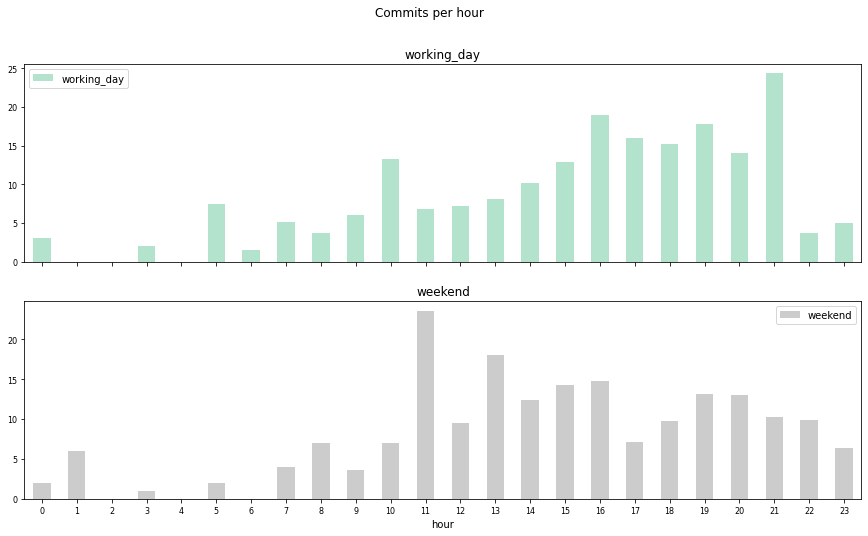

In [ ]:
graph = df.plot.bar(figsize=(15, 8), title='Commits per hour', rot=0, fontsize=8,
                 colormap='Pastel2', sharex=True, subplots=True)

In [32]:
df['working_day'].idxmax()

21

In [33]:
df['weekend'].idxmax()

11

Is the dynamic different on working days and weekends?